In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (12,12)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Survey.csv')

In [4]:
df.columns

Index(['Timestamp',
       'Pleaseconfirmyourvoluntaryparticipationandgiveyourconsentfordata',
       'Profession', 'Country', 'Region', 'Place of residence province',
       '@4.HighestLevelofeducation', '@5.Whichsettingdoyouwork', 'sex', 'Age',
       '@8.Maritalstatus',
       '@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional',
       'COVIDNewsUpdates', 'A1.1HaveyouheardaboutCOVID19',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]',
       'WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]',
       'A3.8 Do you or your household members use internet?',
       'A3.9 Please indicate which of the following do you use for COVID-19

In [39]:
#Removing Other Genders due lack of sufficient Data (only 5 datapoints)
df = df[df['sex'].isin(['1','2'])]

In [77]:
#Rectifying Score 'I 2' to 1
df['B2.2 Do you think home quarantine can reduce COVID-19 outbreaks?'].replace({'I 2':'1'},inplace=True)

In [64]:
df['B2.2 Do you think home quarantine can reduce COVID-19 outbreaks?'].value_counts()

5    1894
4     802
3     168
1      89
2      83
Name: B2.2 Do you think home quarantine can reduce COVID-19 outbreaks?, dtype: int64

In [78]:
from pprint import pprint
from scipy import stats
def chi_squared_test(df,country):
    df = df[df['Country'] == country]
    df_test = df[['sex']]
    df_test['sex']
    df_test['Quarantine'] = df['B2.2 Do you think home quarantine can reduce COVID-19 outbreaks?']
    contingency_table = pd.crosstab(df_test['sex'],df_test['Quarantine'])
    stat,p,dof,expected = stats.chi2_contingency(contingency_table)
    prob = 0.95
#     print(country,dof,df_test['Quarantine'].value_counts())
    critical = stats.chi2.ppf(prob,dof)
    return country, stat,critical

In [74]:
countries = df.Country.value_counts().index[:6].tolist()
results = []
for country in countries:
    results.append(chi_squared_test(df,country))
output = pd.DataFrame(results, columns = ['Country','Value', 'Critical'])

In [75]:
output['Significant'] = output['Value'] > output['Critical']

In [76]:
output

,Country,Value,Critical,Significant
0,China,8.405439,9.487729,False
1,Maxico,1.509692,9.487729,False
2,Bangladesh,10.103301,9.487729,True
3,United States,2.718347,9.487729,False
4,Pakistan,5.508828,9.487729,False
5,Malaysia,2.556046,9.487729,False


<AxesSubplot:xlabel='Lockdown'>

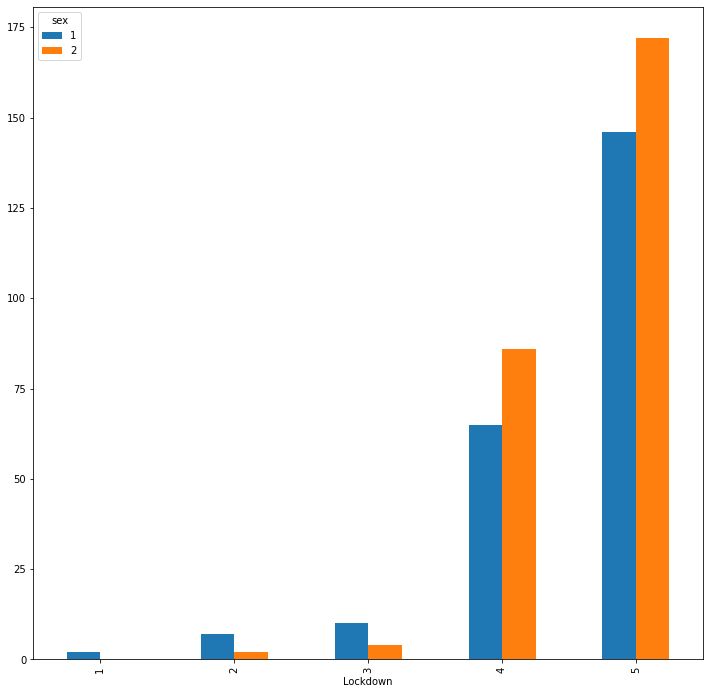

In [73]:
contingency_table.T.plot.bar(stacked=False)

<AxesSubplot:title={'center':'Lockdown'}, xlabel='[sex]'>

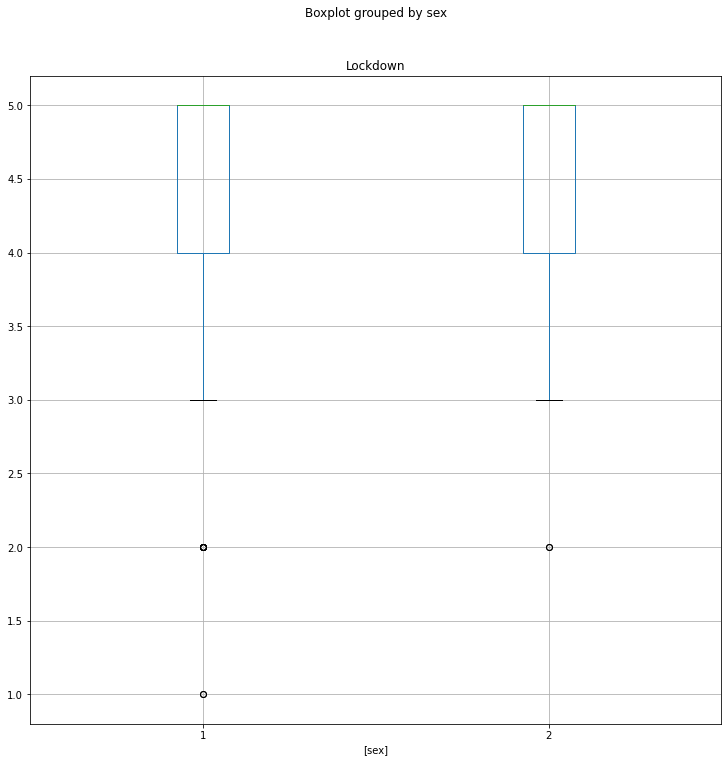

In [139]:
df_test.boxplot(column=['Lockdown'],by=['sex'])